# CNN Autoencoder
 simple autoencoder on CIFAR-10 dataset.

### Import required libraries

In [ ]:
from keras.datasets import cifar10
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

### Load the CIFAR-10 dataset

In [ ]:
# Load CIFAR-10 data
(X_train, _), (X_test, _) = cifar10.load_data()

# Normalize pixel values to between 0 and 1
X_train = X_train.astype("float32") / 255.
X_test = X_test.astype("float32") / 255.

# Print information about the data
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# Define the shape of the input data
input_img = Input(shape=(32, 32, 3))

### Build the network and Train

In [6]:
# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

encoded = MaxPooling2D((2, 2), padding='same', name='encoder')(x)

# Decoder1
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Decoder2
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded2 = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Create the autoencoder model
autoencoder = Model(input_img, [decoded, decoded2])

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Print the model summary
autoencoder.summary()

# Fit the model with the reshaped input data
epochs = 50
batch_size = 128
history = autoencoder.fit(X_train, [X_train, X_train], batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, [X_test, X_test]))


X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_22 (Conv2D)             (None, 32, 32, 16)   448         ['input_3[0][0]']                
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 16, 16, 16)  0           ['conv2d_22[0][0]']              
                                                                                                  
 conv2d_23 (Conv2D)             (None, 16, 16, 8)    1160        ['max_pooling2d_4[0][0]']        
                   

### Plot

313/313 [==============================] - 3s 9ms/step


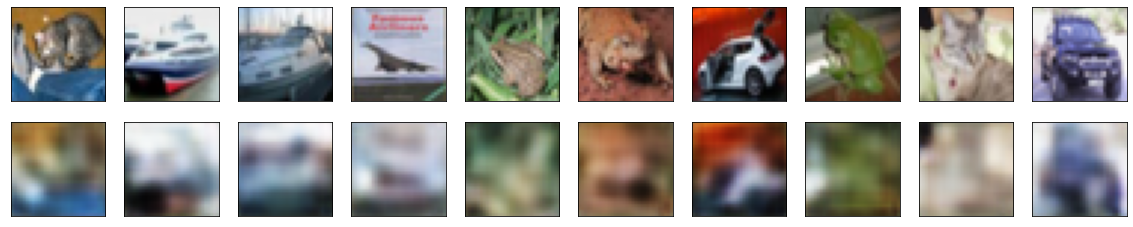

In [7]:
decoded_imgs = autoencoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction from the first decoder
    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(decoded_imgs[0][i].reshape(32, 32, 3))  # Use the original shape (32, 32, 3)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


### Evaluation

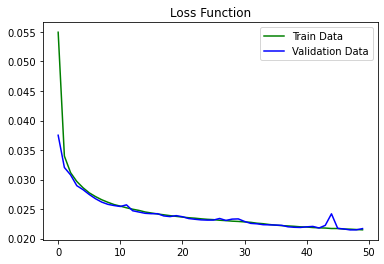

In [8]:
plt.plot(history.history['loss'], color='green', label='Train Data')
plt.plot(history.history['val_loss'], color='blue', label='Validation Data')
plt.title('Loss Function')
plt.legend()
plt.show()